In [153]:
#importing libraries
import numpy as np
import matplotlib.pyplot as mt
import seaborn as sn

#importing data from csv file


import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_997aecb5c1a043479e92a07592881bdb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='n5t1V5lg_u7btMdopYqssztXqvrwWVhAdIAFjwDGKK2j',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_997aecb5c1a043479e92a07592881bdb.get_object(Bucket='project1-donotdelete-pr-6eykjir1vxqzjh',Key='compresive_strength_concrete.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
data = df_data_1

In [113]:
#moving data into dataset variable

In [154]:
data.head()
dataset = pd.DataFrame(data)
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [115]:
#renaming columns of dataframe
dataset.columns=['cement','slag','ash','water','plasticizer','coarse','fine','age','strength']
dataset.head()

,cement,slag,ash,water,plasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [155]:
#checking for null values if any
#dataset.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [156]:
#no null values found
#hence slicing dataframe into dependent and independent ndarrays
x=dataset.iloc[0:,0:8].values
#x is independen variables array
y=dataset.iloc[0:,8:].values
#y is dependent variables array

In [157]:
#splitting data into training and testing sets

In [158]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# Multiple Linear Regression

In [159]:
#applying multiple linear regression
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()

#fitting data into multiple linear regression model
lrg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
#predicting the dataset for test set
ypred1=lrg.predict(xtest)
ypred1

array([[39.16168311],
       [14.61985573],
       [61.44006681],
       [53.77704184],
       [24.66843056],
       [53.44824826],
       [46.03635103],
       [27.0142886 ],
       [52.97935681],
       [37.7669688 ],
       [16.78225173],
       [39.38067954],
       [29.58730029],
       [35.96292876],
       [47.58040332],
       [56.53181108],
       [35.48381341],
       [29.5710143 ],
       [48.31448876],
       [35.09926523],
       [53.50039223],
       [32.6381569 ],
       [32.78602889],
       [47.85367457],
       [23.52304214],
       [23.49824614],
       [69.33646719],
       [26.46234841],
       [56.53181108],
       [48.29138728],
       [18.94539881],
       [36.73148524],
       [17.69801487],
       [19.85998727],
       [24.52854945],
       [15.47194289],
       [52.98743408],
       [27.88380095],
       [27.4939795 ],
       [26.11003546],
       [52.37737924],
       [30.70653948],
       [25.82766787],
       [35.35266432],
       [53.49326786],
       [53

In [162]:
#finding score for regression
lrg.score(xtest,ytest)

0.6369606518338298

In [163]:
#finding score, mean_square_error, mean_absolute-error using metrics in sklearn

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MLRA=r2_score(ytest, ypred1) 
MLRMS=mean_squared_error(ytest, ypred1) 
MLRMA=mean_absolute_error(ytest, ypred1) 
print(f"r2_score : {MLRA}")
print(f"mean_squared_error : {MLRMS}")
print(f"mean_absolute_error : {MLRMA}")

r2_score : 0.6369606518338298
mean_squared_error : 95.61717380589968
mean_absolute_error : 7.864641991336005


# Polynomial Regression

In [164]:
#applying polynomial features for the dataset
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

#fitting and transforming data to polynomial regression model
pf.fit_transform(x,y)


array([[1.00000000e+00, 5.40000000e+02, 0.00000000e+00, ...,
        1.27953280e+07, 5.29984000e+05, 2.19520000e+04],
       [1.00000000e+00, 5.40000000e+02, 0.00000000e+00, ...,
        1.27953280e+07, 5.29984000e+05, 2.19520000e+04],
       [1.00000000e+00, 3.32500000e+02, 1.42500000e+02, ...,
        9.52657200e+07, 4.33026000e+07, 1.96830000e+07],
       ...,
       [1.00000000e+00, 1.48500000e+02, 1.39400000e+02, ...,
        1.70352000e+07, 6.11520000e+05, 2.19520000e+04],
       [1.00000000e+00, 1.59100000e+02, 1.86700000e+02, ...,
        1.74261699e+07, 6.18497600e+05, 2.19520000e+04],
       [1.00000000e+00, 2.60900000e+02, 1.00500000e+02, ...,
        1.62367030e+07, 5.97016000e+05, 2.19520000e+04]])

In [165]:
#splitting the fitted data into training and testing sets
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x,y,test_size=0.2,random_state=0)

In [166]:
#training the model with transformed data
pf.fit(xtrain2,ytrain2)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [168]:
#creating instance for linear regression
#training model with polynomial featured data 

lrg2 = LinearRegression()
lrg2.fit(xtrain2,ytrain2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
#predicting output for test input
ypred2=lrg2.predict(xtest2)

In [170]:
#finding score for regressor model
lrg2.score(xtest2,ytest2)

0.6369606518338298

In [171]:
#finding score,mean_error using metrics in sklearn
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MLRA=r2_score(ytest2, ypred2) 
MLRMS=mean_squared_error(ytest2, ypred2) 
MLRMA=mean_absolute_error(ytest2, ypred2) 
print(f"r2_score : {MLRA}")
print(f"mean_squared_error : {MLRMS}")
print(f"mean_absolute_error : {MLRMA}")

r2_score : 0.6369606518338298
mean_squared_error : 95.61717380589968
mean_absolute_error : 7.864641991336005



# Decision Tree

In [172]:
# importing decision tree regressor from sklearn library
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#training model with training set data 
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [173]:
#predicting output for test input
ypred3 = dtr.predict(xtest)

In [174]:
##finding score for decision tree regressor model
dtr.score(xtest,ytest)

0.7843773454305244

In [178]:
#finding prediction 
k=lrg.predict([[330,120,1,342,2,900,300,42]])
k

array([[4.4898492]])

In [176]:
#finding r2_score and mean_errors using sklearn library

MLRA=r2_score(ytest, ypred3) 
MLRMS=mean_squared_error(ytest, ypred3) 
MLRMA=mean_absolute_error(ytest, ypred3) 
print(f"r2_score : {MLRA}")
print(f"mean_squared_error : {MLRMS}")
print(f"mean_absolute_error : {MLRMA}")

r2_score : 0.7843773454305244
mean_squared_error : 56.790617718446605
mean_absolute_error : 4.754466019417476


# Ridge Regression

In [135]:
#ridge regression
from sklearn.linear_model import Ridge
#creating instance for Ridge
rdg = Ridge()
#fitting the train data 
rdg.fit(xtrain,ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [136]:
#predicting the values using  the test inputs
ypred4 = rdg.predict(xtest)

In [137]:
#finding the score for the Ridge regression 
rdg.score(xtest,ytest)

0.6369610478018403

In [138]:
# Finding r2_score and mean_errors using sklearn library
MLRA=r2_score(ytest, ypred4) 
MLRMS=mean_squared_error(ytest, ypred4) 
MLRMA=mean_absolute_error(ytest, ypred4) 
print(f"r2_score : {MLRA}")
print(f"mean_squared_error : {MLRMS}")
print(f"mean_absolute_error : {MLRMA}")

r2_score : 0.6369610478018403
mean_squared_error : 95.61706951598656
mean_absolute_error : 7.864634335330142


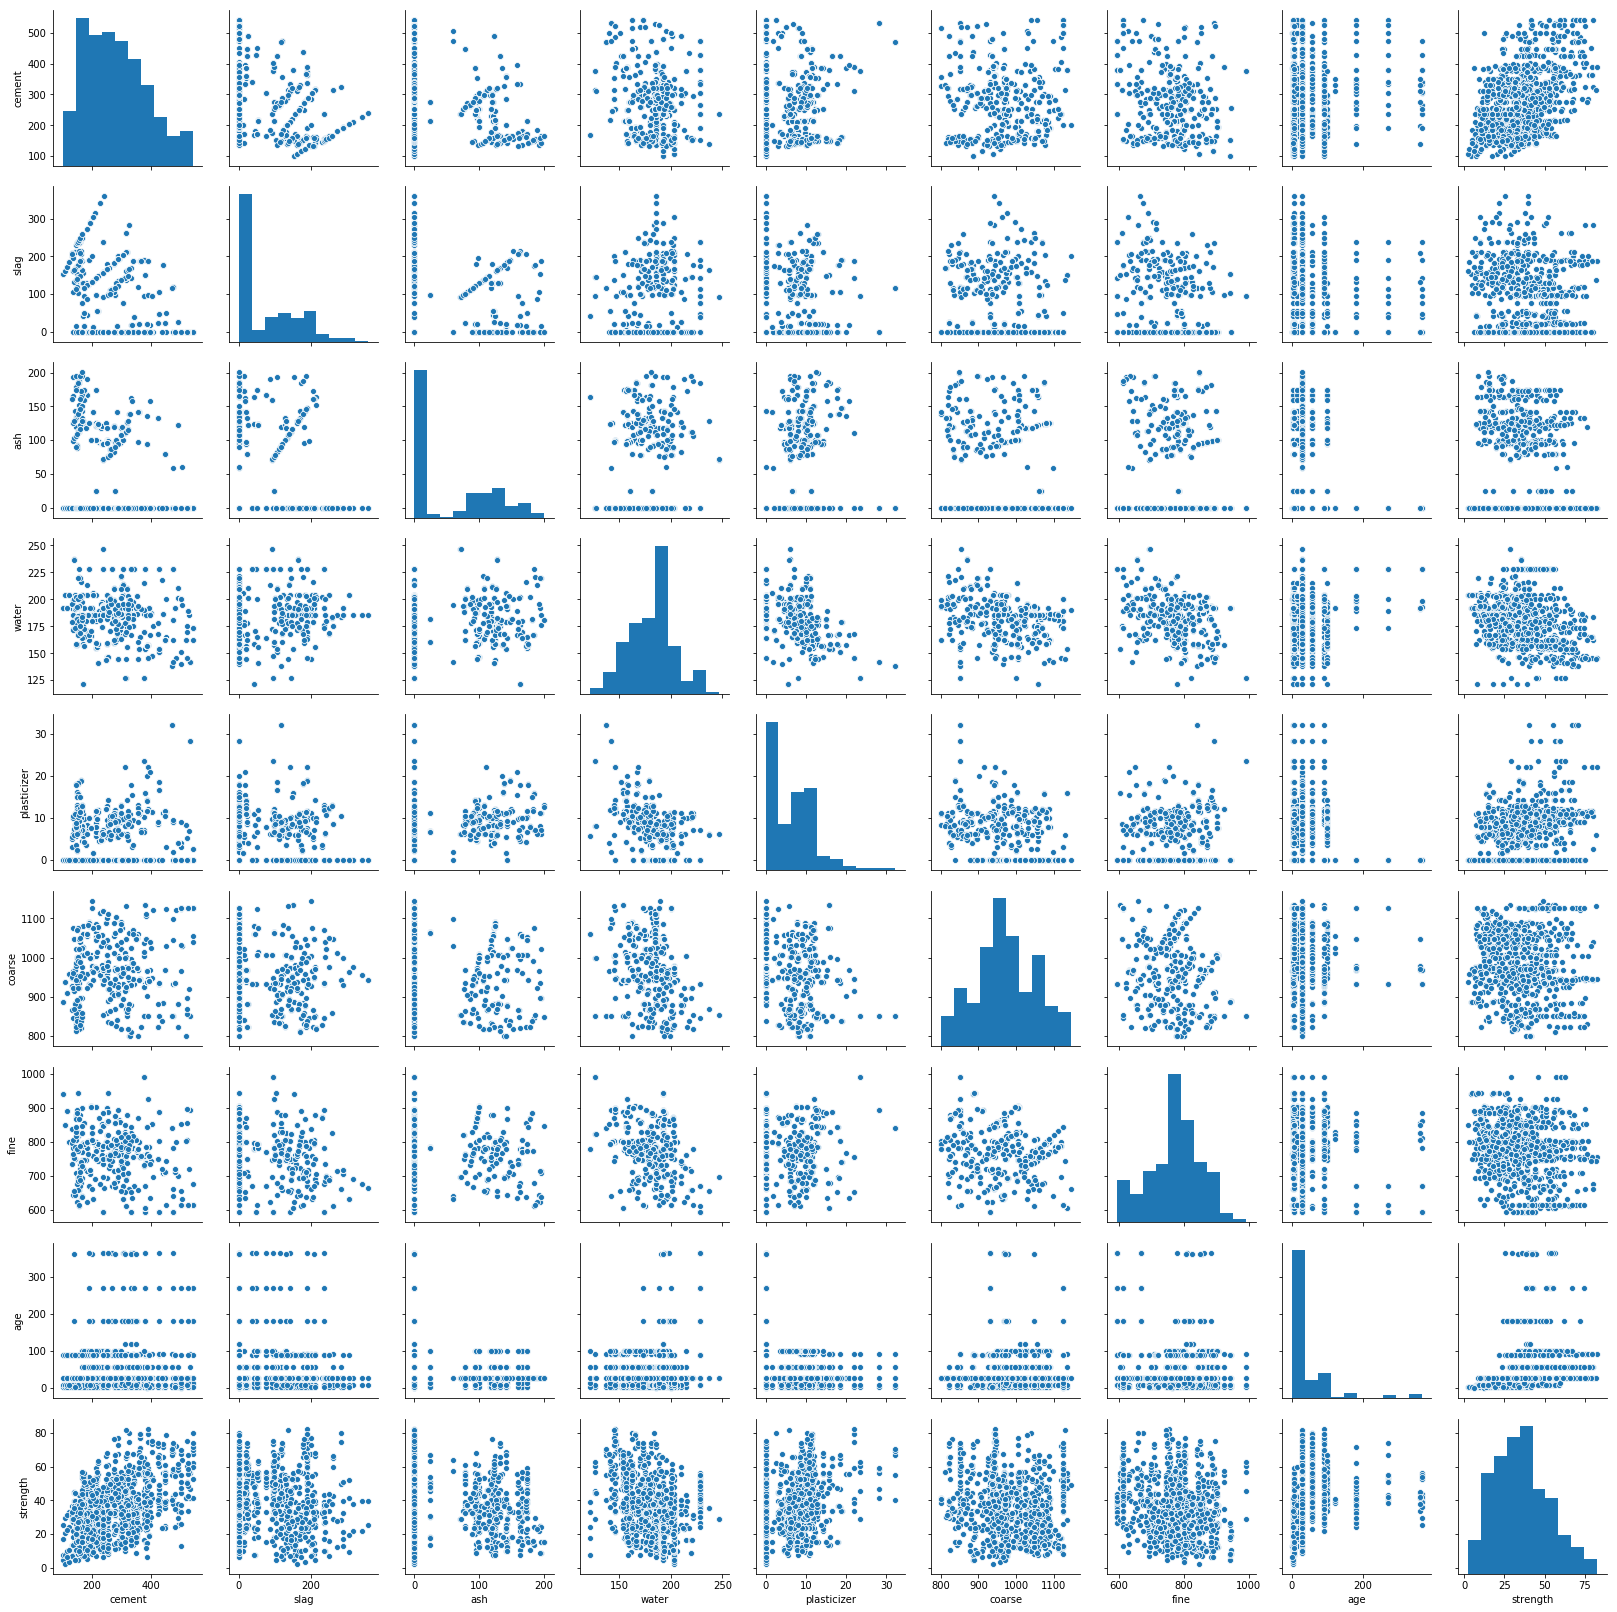

In [139]:
# representing the relations betwwen variables using the pairplots
sn.pairplot(dataset)

In [140]:
dataset.columns

Index(['cement', 'slag', 'ash', 'water', 'plasticizer', 'coarse', 'fine',
       'age', 'strength'],
      dtype='object')

In [142]:
#plots for parameters and strength
count = np.size(dataset.columns)
count
#mt.scatter(dataset.iloc[0:100,0:1],dataset.iloc[0:100,3:4],'g')

9

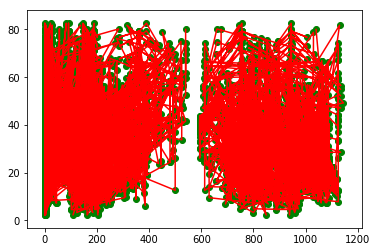

In [179]:
#plotting parameters with respect to strength
for i in range(count):
    c=dataset.iloc[0:,i:i+1].values
    r=dataset.iloc[0:,-1:].values
    mt.plot(c,r,color='red')
    mt.scatter(c,r,color='green')
    mt.xlabel='strength'
    mt.ylabel=dataset.columns[i]
    

In [180]:
#deploying project
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials={"apikey": "cFbck8WLXg-sjNGbyz73u1CmRuDy3uGeACkXWMr9XZpq",
  "iam_apikey_description": "Auto-generated for key f747b0c6-8282-43de-87d3-893d11e48e73",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/6b48e6b800ba4744824b7899b118adf4::serviceid:ServiceId-24edfa02-3565-4739-adb8-000177f234b6",
  "instance_id": "01dc6a4c-03d3-4308-b877-45b85703f1d0",
  "url": "https://eu-gb.ml.cloud.ibm.com"
    }

In [181]:
#creating client instance 
client = WatsonMachineLearningAPIClient(wml_credentials)
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME:"GC",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"gc@gmail.com",
    client.repository.ModelMetaNames.NAME:"concrete"
}

In [182]:
model_artifact =client.repository.store_model(dtr,meta_props=model_props)

In [183]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [184]:
created_deployment=client.deployments.create(published_model_uid,name="concrete")



#######################################################################################

Synchronous deployment creation for uid: '42912a53-8189-4f7a-9721-3218faa5134f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e49e8591-505f-4249-8bc4-e2b1f099fee2'
------------------------------------------------------------------------------------------------




In [185]:
scoring_endpoint=client.deployments.get_scoring_url(created_deployment)

In [186]:
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/01dc6a4c-03d3-4308-b877-45b85703f1d0/deployments/e49e8591-505f-4249-8bc4-e2b1f099fee2/online
